In [248]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import math
pd.set_option('display.max_rows', 3000)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import math
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import RobustScaler

In [249]:
train = pd.read_csv("/Users/shubhvarma/Downloads/train (1).csv")
test = pd.read_csv("/Users/shubhvarma/Downloads/test (1).csv")

In [250]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

In [251]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [252]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

In [253]:
ntrain = train.shape[0]
ntest = test.shape[0] #use this for splitting up all_data later
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 79)

In [254]:
all_data = all_data.drop(labels = 'PoolQC', axis = 1)
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(0)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['GrLivArea2'] = (all_data['GrLivArea']**(1/2))
all_data = all_data.drop('GrLivArea', axis = 1)
all_data['HalfBath2'] = all_data['HalfBath']
all_data.loc[all_data['HalfBath'] >= 1,'HalfBath2'] = .5
all_data['Bathrooms'] = all_data['FullBath'] + all_data['HalfBath2']
all_data = all_data.drop('FullBath', axis = 1)
all_data = all_data.drop('HalfBath', axis = 1)
all_data = all_data.drop('HalfBath2', axis = 1)
all_data['LotArea2'] = np.log(all_data['LotArea']+1)
all_data = all_data.drop('LotArea', axis = 1)
all_data['LotFrontage'] = all_data['LotFrontage'].astype(int)
all_data['LotFrontage2'] = (all_data['LotFrontage']**(1/2))
all_data = all_data.drop('LotFrontage', axis = 1)
all_data['ShedSF'] = 0
all_data.loc[all_data['MiscFeature'] == 'Shed', 'ShedSF'] = all_data['MiscVal']
all_data = all_data.drop('MiscFeature', axis = 1)
all_data = all_data.drop('MiscVal', axis = 1)
all_data = all_data.drop('TotalBsmtSF', axis = 1)
all_data = all_data.drop('LowQualFinSF', axis = 1)
# #3SsnPorch
all_data = all_data.drop('3SsnPorch', axis = 1)
# #Alley
# #93% of the data is NA
all_data = all_data.drop('Alley', axis = 1)
# #BldgType
# #Very unbalanced
all_data = all_data.drop('BldgType', axis = 1)
# #Condition2
# #99% of the data is Norm
all_data = all_data.drop('Condition2', axis = 1)
#Fence
all_data['HasFence'] = 0
all_data.loc[all_data['Fence'] != 'NA','HasFence'] = 1
all_data = all_data.drop('Fence', axis = 1)
#Garage
all_data = all_data.drop('GarageQual', axis = 1)
# #GarageYrBlt
# #Does the garage built year matter? I dont think so. We have quality and condition to assess this.
# #I will test dropping it. Or we can use range of years to see if it will improve.
all_data = all_data.drop('GarageYrBlt', axis = 1)
# #HouseStyle and MSSubClass MAY CONTAIN THE SAME INFORMATION. WE SHOULD TEST DROPING ONE OF THEM.
all_data = all_data.drop('MSSubClass', axis = 1)
# #MoSold
# #There is no very significant difference between months, but what if we join the year?
all_data = all_data.drop('MoSold', axis = 1)

In [255]:
from sklearn.preprocessing import LabelEncoder
cols = ('GarageCond','FireplaceQu', 'BsmtQual', 'BsmtCond', 
        'ExterQual', 'ExterCond','HeatingQC', #'PoolQC', 
        'KitchenQual', 'Functional', 'BsmtFinType1', 'BsmtFinType2',
        'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 
        'CentralAir', 'OverallCond', 
        'YrSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

Shape all_data: (2917, 66)


In [270]:
###Use below code for SVR only

#numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
#skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness.head(10)

In [271]:
###Use below code for SVR only

#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
#    all_data[feat] = boxcox1p(all_data[feat], lam)
#    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [256]:
all_data = pd.get_dummies(all_data)

(2917, 193)


In [257]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [258]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [259]:
#best score is without removing logs/skewness (alpha = .0005, score = .1090)
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.cross_validation import cross_val_score
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
lasso.fit(train.values, y_train)

lasso score: 0.1090 (0.0060)



Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [260]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0006, l1_ratio=.8, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
ENet.fit(train.values, y_train)

ElasticNet score: 0.1091 (0.0060)



Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0006, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])

4     0.111376
5     0.111197
6     0.111096
7     0.111044
8     0.111023
9     0.111023
10    0.111039
11    0.111065
12    0.111099
13    0.111139
14    0.111183
15    0.111231
16    0.111282
17    0.111334
18    0.111388
19    0.111442
20    0.111498
dtype: float64

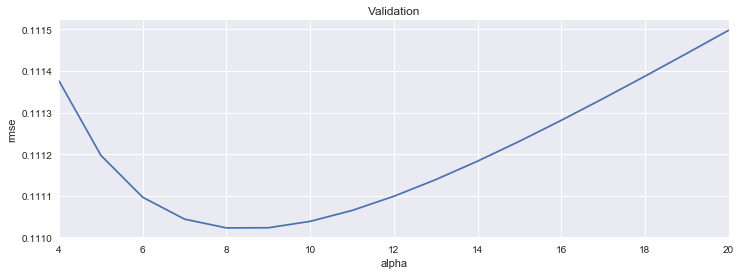

In [261]:
#Getting best alpha for ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cv_ridge = [rmse_cv(linear_model.Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
#alpha = 6 is the best option
cv_ridge

In [265]:
#best score is without removing logs/skewness (alpha = 11, score = .1157)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model

ridge = make_pipeline(RobustScaler(), linear_model.Ridge(alpha = 8, random_state=1))
score = rmsle_cv(ridge)
print("ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
ridge.fit(train.values, y_train)
#ridge = linear_model.Ridge(alpha = 5)
#ridge_scores = cross_val_score(ridge, housing_model, housing_target_train2, scoring='neg_mean_squared_error', cv = 5)
#ridge_scores = np.sqrt(-ridge_scores)
#ridge_predictions = cross_val_predict(ridge, housing_model, housing_target_train2, cv = 5)
#ridge.fit(housing_model, housing_target_train2)

ridge score: 0.1109 (0.0058)



Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001))])

In [94]:
lasso_pred_train = np.expm1(lasso.predict(train.values))
lasso_pred_test = np.expm1(lasso.predict(test.values))
lasso_pred_test = pd.DataFrame({'Id': test_ID, 'SalePrice': lasso_pred_test})
lasso_pred_test.to_csv('Lasso_submission.csv', index = False)

In [266]:
ridge_pred_train = np.expm1(ridge.predict(train.values))
ridge_pred_test = np.expm1(ridge.predict(test.values))
ridge_pred_test = pd.DataFrame({'Id': test_ID, 'SalePrice': ridge_pred_test})
ridge_pred_test.to_csv('Ridge_submission.csv', index = False)

In [267]:
ENet_pred_train = np.expm1(ENet.predict(train.values))
ENet_pred_test = np.expm1(ENet.predict(test.values))
ENet_pred_test = pd.DataFrame({'Id': test_ID, 'SalePrice': ENet_pred_test})
ENet_pred_test.to_csv('ENet_submission.csv', index = False)

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.cross_validation import cross_val_score
SVR = make_pipeline(SVR(kernel = 'rbf', C = 100, gamma = 0.001, epsilon = 0.0001))
score = rmsle_cv(SVR)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [119]:
SVR.fit(train.values, y_train)
svr_pred_train = np.expm1(SVR.predict(train.values))
svr_pred_test = np.expm1(SVR.predict(test.values))

In [ ]:
SVRSubmission = pd.DataFrame({ 'Id': test_ID,
                            'SalePrice': svr_pred_test })
SVRSubmission.to_csv("SVRSubmission_test.csv", index=False)

In [74]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
parameters = {'kernel':['rbf'], 'C':[1,10,50,100], 'gamma':[1e-7, .1],'epsilon':[0.0000001,0.2]}
svc1 = svm.SVR()
clf1 = GridSearchCV(svc1, parameters, verbose = 1)
clf1.fit(train.values, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   52.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': [1e-05, 0.0001], 'C': [100, 500, 1000], 'gamma': [0.001, 0.1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [ ]:
clf1.best_params_